In [4]:
## import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
titanic_df = pd.read_csv("./titanic/train.csv")

# Mission : It's Your Turn!

#### 1. 본문에서 언급된 Feature을 제외하고 유의미한 Feature을 1개 이상 찾아보자!

In [6]:
titanic_df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

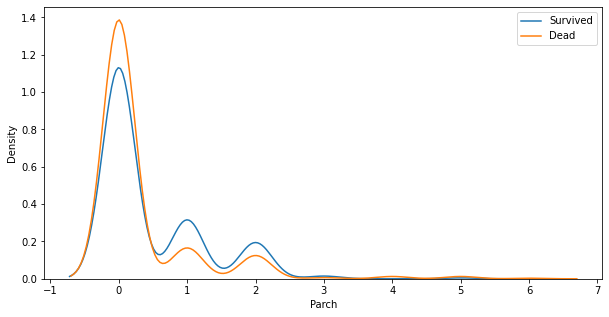

In [7]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
sns.kdeplot(x=titanic_df[titanic_df.Survived == 1]['Parch'], ax=ax)
sns.kdeplot(x=titanic_df[titanic_df.Survived == 0]['Parch'], ax=ax)
plt.legend(['Survived', 'Dead'])
plt.show()

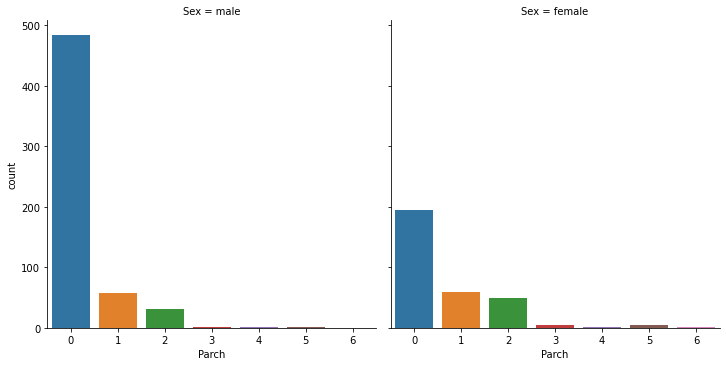

In [8]:
sns.catplot(x='Parch', col='Sex', kind='count', data=titanic_df)
plt.show()

In [9]:
titanic_df[['Parch', 'Sex']].groupby('Sex').mean()
# 평균 Parch가 높은 것을 봐서 female 보다 male이 혼자 많이 온다는 것을 알 수 있음.

,Parch
Sex,
female,0.649682
male,0.235702


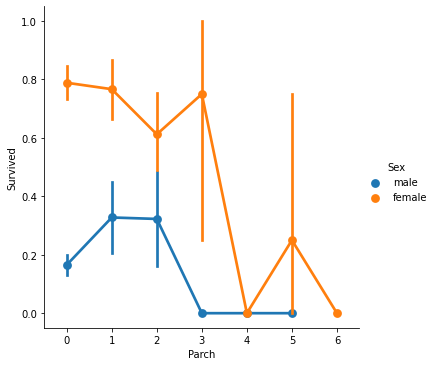

In [10]:
#근데 female이 살아남을 확률이 높았으니까, Parch가 0에 가까울 수록
#survive 할 확률이 낮은건가?
sns.catplot(x='Parch', y='Survived', hue='Sex', kind='point', data=titanic_df)
plt.show()
#그건 아닌 것 같다. 왜냐하면 3,4,5,6 의 표본이 너무 적음

In [11]:
titanic_df[['Sex', 'Survived', 'Parch']].groupby(['Sex', 'Parch']).mean()

Survived
Sex    Parch          
female 0      0.788660
       1      0.766667
       2      0.612245
       3      0.750000
       4      0.000000
       5      0.250000
       6      0.000000
male   0      0.165289
       1      0.327586
       2      0.322581
       3      0.000000
       4      0.000000
       5      0.000000

In [12]:
# 3,4,5,6 은 표본이 너무 작아서 거의 데이터가 무의미 또한 3,4,5,6의 경우 대부분 사망
titanic_df[['Sex', 'Survived', 'Parch']].groupby(['Sex', 'Parch']).count()

Survived
Sex    Parch          
female 0           194
       1            60
       2            49
       3             4
       4             2
       5             4
       6             1
male   0           484
       1            58
       2            31
       3             1
       4             2
       5             1

In [13]:
# female의 경우 0,1,2만 보았을 때 여성은 오히려 혼자 왔을 경우 
# survive 확률이 높은 반면
# 남자는 혼자온 경우 survive 확률이 낮음.